# Explore here

In [329]:
# Your code here
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


dataframe = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/linear-regression-project-tutorial/main/medical_insurance_cost.csv", delimiter=",")

dataframe.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [330]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [331]:
dataframe.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [332]:
if dataframe.isna().sum().sum() > 0 or dataframe.isnull().sum().sum() > 0:
    dataframe.dropna(inplace=True, axis=1, how=all)
    print("There are missing values")

if dataframe.duplicated().sum() > 0:
    dataframe = dataframe.drop_duplicates().reset_index(drop=True)
    print("There are duplicates")

dataframe.describe()

There are duplicates


,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


In [333]:
dataframe['sex'] = pd.factorize(dataframe['sex'])[0]
dataframe["smoker"] = dataframe["smoker"].map({"no": 0, "yes": 1})
dataframe = pd.get_dummies(dataframe, columns=['region'], drop_first=True)
dataframe = dataframe.apply(lambda x: x.astype(int) if x.name.startswith('region_') else x)
dataframe.head()


,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


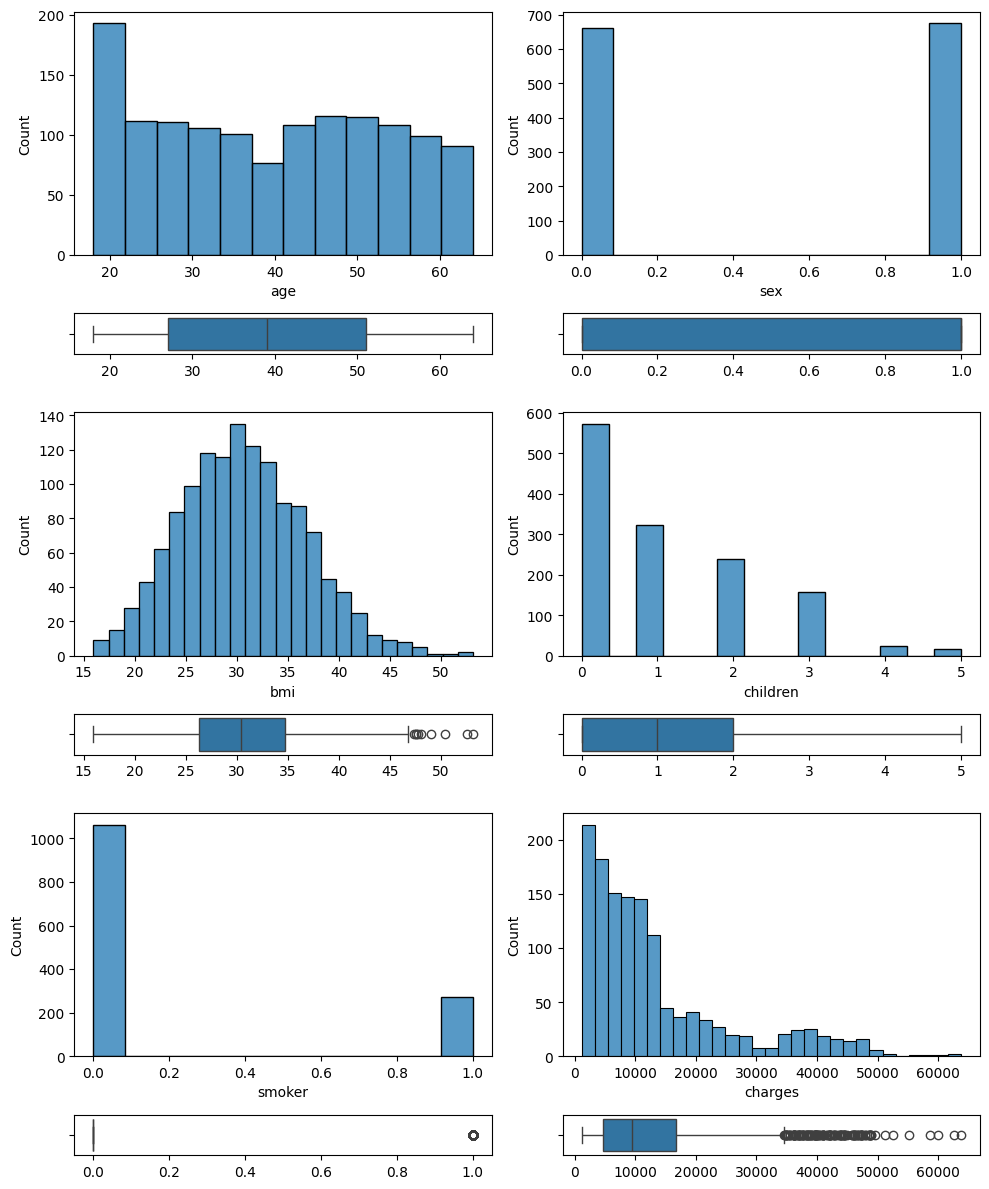

In [334]:
features = dataframe.drop(columns=['region_northwest', 'region_southeast', 'region_southwest']).columns

fig, ax = plt.subplots(len(features), 2, figsize=(10, 12), 
                       gridspec_kw={'height_ratios': [6, 1] * (len(features) // 2)})

for i, feature in enumerate(features):
    row = (i // 2) * 2 
    col = i % 2
    sns.histplot(ax=ax[row, col], data=dataframe, x=feature)
    sns.boxplot(ax=ax[row + 1, col], data=dataframe, x=feature).set(xlabel=None)


plt.tight_layout()
plt.show()

Age:

    Histogram: Most people are between 18 and 20 years old. There is a relatively even distribution between 20 and 60 years, with a slight decrease in older age groups.

    Box Plot: The median is around 40 years, with an interquartile range from approximately 27 to 52 years.

Sex:

    Histogram: There are two categories, 0 and 1, likely representing male and female. Both categories have a similar number of individuals.

    Box Plot: Shows an even distribution between the two categories.

BMI:

    Histogram: Most people have a BMI between 25 and 35, with a peak around 30.

    Box Plot: The median is around 30, with an interquartile range from approximately 25 to 35. There are some outliers above 45.

Children:

    Histogram: Most people have no children, and the number of people decreases as the number of children increases.

    Box Plot: The median is 1 child, with an interquartile range from 0 to 2 children.

Smoker:

    Histogram: Most people are non-smokers (category 0), with fewer smokers (category 1).

    Box Plot: Shows a distribution with a majority in category 0 and some outliers in category 1.

Charges:

    Histogram: Most people have charges below 10,000, with a gradual decrease as charges increase.

    Box Plot

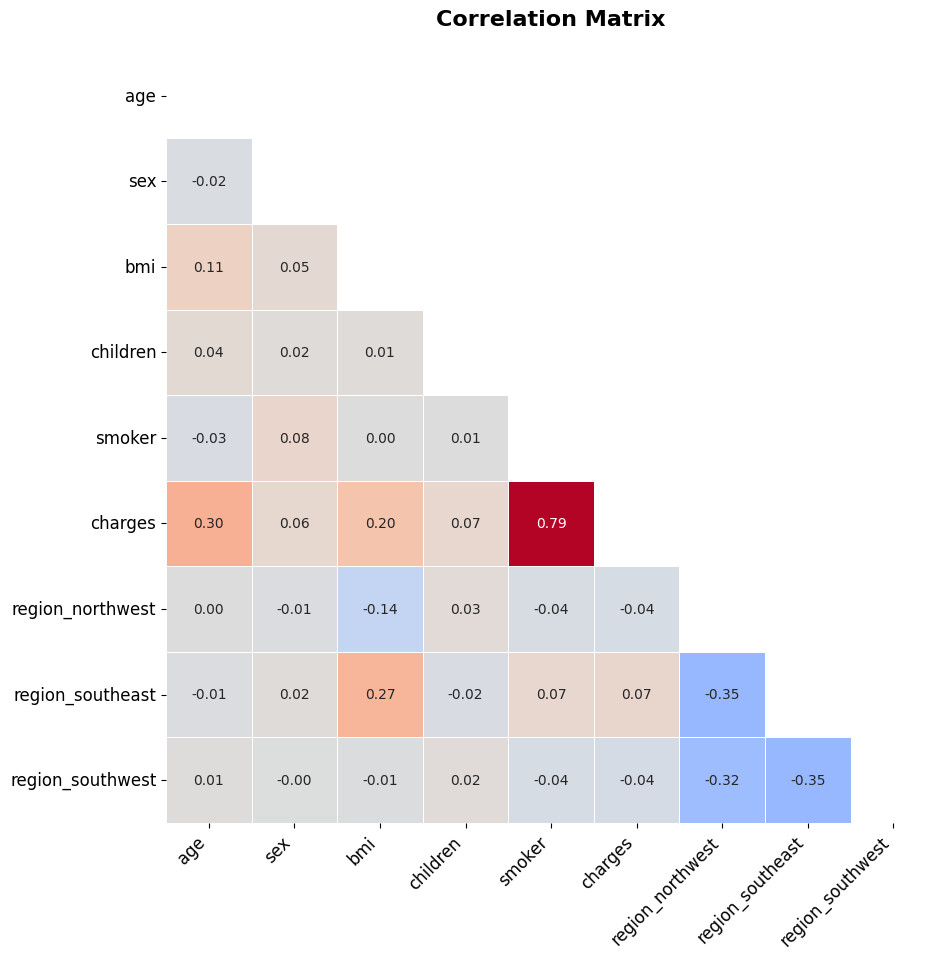

In [335]:
import numpy as np

# Correlation heatmap
plt.figure(figsize=(12, 10))

corr_matrix = dataframe.corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

sns.heatmap(
    corr_matrix, 
    mask=mask,
    annot=True, 
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.5,
    square=True,
    cbar=False,
    cbar_kws={"shrink": 0.75},
    annot_kws={"size": 10}
)

plt.title("Correlation Matrix", fontsize=16, fontweight="bold", pad=20)
plt.xticks(fontsize=12, rotation=45, ha="right")
plt.yticks(fontsize=12)

plt.show()


The most notable correlation is between Smoker and Charges, with a coefficient of 0.79, indicating a strong positive correlation. This suggests that smokers tend to have higher charges.

There are moderate positive correlations between BMI and Charges.

Most other variables show low to moderate correlations with each other, indicating weaker relationships.

In [336]:
def identify_outliers(df):
    outlier_info = {}

    for col in df.select_dtypes(include='number').columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1 

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

        if not outliers.empty:
            outlier_info[col] = {
                'outliers_count': outliers.shape[0],
                'lower_bound': lower_bound,
                'upper_bound': upper_bound,
                'outlier_values': outliers[col].tolist()
            }

    for col, info in outlier_info.items():
        print(f"Column: {col}")
        print(f"  Number of outliers: {info['outliers_count']}")
        print(f"  Low Limit: {info['lower_bound']}")
        print(f"  High Limit: {info['upper_bound']}")
        print(f"  Outliers: {info['outlier_values'][:5]}...\n")
    return outlier_info

In [337]:
outlier_info = identify_outliers(dataframe)

Column: bmi
  Number of outliers: 9
  Low Limit: 13.674999999999994
  High Limit: 47.31500000000001
  Outliers: [49.06, 48.07, 47.52, 47.41, 50.38]...

Column: smoker
  Number of outliers: 274
  Low Limit: 0.0
  High Limit: 0.0
  Outliers: [1, 1, 1, 1, 1]...

Column: charges
  Number of outliers: 139
  Low Limit: -13120.716174999998
  High Limit: 34524.777625
  Outliers: [39611.7577, 36837.467, 37701.8768, 38711.0, 35585.576]...

Column: region_northwest
  Number of outliers: 324
  Low Limit: 0.0
  High Limit: 0.0
  Outliers: [1, 1, 1, 1, 1]...

Column: region_southwest
  Number of outliers: 325
  Low Limit: 0.0
  High Limit: 0.0
  Outliers: [1, 1, 1, 1, 1]...



In [338]:
def remove_outliers(df, outlier_info):
    
    for col, info in outlier_info.items():
        if col == 'smoke' or col.startswith('region_'):
            continue
        lower_limit = info['lower_bound']
        upper_limit = info['upper_bound']
        
        if lower_limit < 0:
            df = df[df[col] >= lower_limit]
        if upper_limit > 0:
            df = df[df[col] <= upper_limit]

        
    return df


In [339]:
dataframe_without_outliers = remove_outliers(dataframe, outlier_info)

dataframe_without_outliers.describe().round(2)

,age,sex,bmi,children,smoker,charges,region_northwest,region_southeast,region_southwest
count,1192.00,1192.00,1192.00,1192.00,1192.00,1192.00,1192.00,1192.00,1192.00
mean,39.00,0.49,30.00,1.09,0.12,9949.24,0.26,0.25,0.24
std,14.06,0.50,5.87,1.22,0.32,7250.38,0.44,0.44,0.43
min,18.00,0.00,15.96,0.00,0.00,1121.87,0.00,0.00,0.00
25%,26.00,0.00,25.80,0.00,0.00,4425.46,0.00,0.00,0.00
50%,39.00,0.00,29.72,1.00,0.00,8411.75,0.00,0.00,0.00
75%,51.00,1.00,33.77,2.00,0.00,12979.85,1.00,1.00,0.00
max,64.00,1.00,46.75,5.00,1.00,34472.84,1.00,1.00,1.00


In [340]:
def train_split(target, dataframe, test_size=0.1, random_state=42):
    return train_test_split(dataframe.drop(columns=target), dataframe[target], test_size=test_size, random_state=random_state)

In [341]:
from joblib import dump


def standard_scaler(X_train, X_test, filename: str):

    scaler = StandardScaler()
    scaler.fit(X_train)
    
    X_train_norm = scaler.transform(X_train)
    X_test_norm = scaler.transform(X_test)

    X_train_norm = pd.DataFrame(X_train_norm, index=X_train.index, columns=X_train.columns)
    X_test_norm = pd.DataFrame(X_test_norm, index=X_test.index, columns=X_test.columns)

    dump(scaler, f'../data/processed/std_transform_{filename}.sav')

    return X_train_norm, X_test_norm

def min_max_scaler(X_train, X_test, reference: str):
    
    scaler = MinMaxScaler()
    scaler.fit(X_train)
    
    X_train_minmax = scaler.transform(X_train)
    X_train_minmax = pd.DataFrame(X_train_minmax, index = X_train.index, columns=X_train.columns)

    X_test_minmax = scaler.transform(X_test)
    X_test_minmax = pd.DataFrame(X_test_minmax, index = X_test.index, columns=X_test.columns)
    
    dump(scaler, f'../data/processed/minmax_{reference}.sav')

    return X_train_minmax, X_test_minmax


In [342]:
TARGET = 'charges'
X_train_with_outliers, X_test_with_outliers, y_train, y_test = train_split(TARGET, dataframe.copy())
X_train_without_outliers, X_test_without_outliers, y_train_without_outliers, y_test_without_outliers  = train_split(TARGET, dataframe_without_outliers)

#Default
X_train_with_outliers.to_csv('../data/processed/X_train_with_outliers_ts_02_rs_42.csv', index=False)
X_test_with_outliers.to_csv('../data/processed/X_test_with_outliers_ts_02_rs_42.csv', index=False)

y_train.to_csv('../data/processed/y_train.csv', index=False)
y_test.to_csv('../data/processed/y_test.csv', index=False)

#Without outliers
X_train_without_outliers.to_csv('../data/processed/X_train_without_outliers_ts_02_rs_42.csv', index=False)
X_test_without_outliers.to_csv('../data/processed/X_test_without_outliers_ts_02_rs_42.csv', index=False)

y_train_without_outliers.to_csv('../data/processed/y_train_without_outliers.csv', index=False)
y_test_without_outliers.to_csv('../data/processed/y_test_without_outliers.csv', index=False)

In [343]:
X_train_with_outliers_std, X_test_with_outliers_std = standard_scaler(X_train_with_outliers, X_test_with_outliers, 'with_outliers')
X_train_without_outliers_std, X_test_without_outliers_std = standard_scaler(X_train_without_outliers, X_test_without_outliers, 'without_outliers')

X_train_with_outliers_minmax, X_test_with_outliers_minmax = min_max_scaler(X_train_with_outliers, X_test_with_outliers, 'with_outliers')
X_train_without_outliers_minmax, X_test_without_outliers_minmax = min_max_scaler(X_train_without_outliers, X_test_without_outliers, 'without_outliers')



In [344]:
from sklearn.feature_selection import SelectKBest, f_regression


def select_k_best(X_train, X_test, y_train, k, filename: str):

    selection_model = SelectKBest(f_regression, k=k)
    selection_model.fit(X_train, y_train)
    cols = selection_model.get_support()

    dump(selection_model, f'../data/processed/selection_model_{filename}.sav')

    return pd.DataFrame(selection_model.transform(X_train), columns=X_train.columns.values[cols]) , pd.DataFrame(selection_model.transform(X_test), columns=X_test.columns.values[cols])

In [345]:
K = dataframe.shape[1] - 1
X_train_with_outliers_selected, X_test_with_outliers_selected = select_k_best(X_train_with_outliers, X_test_with_outliers, y_train, K, 'with_outliers')
X_train_without_outliers_selected, X_test_without_outliers_selected = select_k_best(X_train_without_outliers, X_test_without_outliers, y_train_without_outliers, K, 'without_outliers')


In [346]:
X_train_with_outliers_std_selected = X_train_with_outliers_std[X_train_with_outliers_selected.columns]
X_train_without_outliers_std_selected = X_train_without_outliers_std[X_train_without_outliers_selected.columns]

X_test_with_outliers_std_selected = X_test_with_outliers_std[X_test_with_outliers_selected.columns]
X_test_without_outliers_std_selected = X_test_without_outliers_std[X_test_without_outliers_selected.columns]


X_train_with_outliers_minmax_selected = X_train_with_outliers_minmax[X_train_with_outliers_selected.columns]
X_train_without_outliers_minmax_selected = X_train_without_outliers_minmax[X_train_without_outliers_selected.columns]

X_test_with_outliers_minmax_selected = X_test_with_outliers_minmax[X_test_with_outliers_selected.columns]
X_test_without_outliers_minmax_selected = X_test_without_outliers_minmax[X_test_without_outliers_selected.columns]


In [ ]:
dfs_train = {
    'X_train_with_outliers_selected': X_train_with_outliers_selected,
    'X_train_with_outliers_std_selected': X_train_with_outliers_std_selected,
    'X_train_with_outliers_minmax_selected': X_train_with_outliers_minmax_selected,
}

dfs_train_without_outliers = {
    'X_train_without_outliers_selected': X_train_without_outliers_selected,
    'X_train_without_outliers_std_selected': X_train_without_outliers_std_selected,
    'X_train_without_outliers_minmax_selected': X_train_without_outliers_minmax_selected 
}

dfs_test = {
    'X_test_with_outliers_selected': X_test_with_outliers_selected,
    'X_test_with_outliers_std_selected': X_test_with_outliers_std_selected,
    'X_test_with_outliers_minmax_selected': X_test_with_outliers_minmax_selected,
}

dfs_test_without_outliers = {
    'X_test_without_outliers_selected': X_test_without_outliers_selected,
    'X_test_without_outliers_std_selected': X_test_without_outliers_std_selected,
    'X_test_without_outliers_minmax_selected': X_test_without_outliers_minmax_selected
}


for name, df in dfs_train.items():
    df.to_csv(f"../data/processed/{name}.csv", index=False)

for name, df in dfs_test.items(): 
    df.to_csv(f'../data/processed/{name}.csv', index=False)

for name, df in dfs_train_without_outliers.items():
    df.to_csv(f"../data/processed/{name}.csv", index=False)

for name, df in dfs_test_without_outliers.items(): 
    df.to_csv(f'../data/processed/{name}.csv', index=False)

In [348]:
train = list(dfs_train.values())
test = list(dfs_test.values())
train_without_outliers = list(dfs_train_without_outliers.values())
test_without_outliers = list(dfs_test_without_outliers.values())

results = []

# Default
for index, train_df in enumerate(train):
    model = LinearRegression()
    model.fit(train_df, y_train)
    y_pred = model.predict(test[index])
    print(model.intercept_)
    print(model.coef_)
    results.append({
        'index': index,
        'df_train': list(dfs_train.keys())[index],
        'Intercept': model.intercept_,
        'Coefficients': model.coef_,
        'y_pred': y_pred
    })

# Without outliers
for index, train_df in enumerate(train_without_outliers):
    model = LinearRegression()
    model.fit(train_df, y_train_without_outliers)
    y_pred = model.predict(test_without_outliers[index])

    results.append({
        'index': index,
        'df_train': list(dfs_train_without_outliers.keys())[index],
        'Intercept': model.intercept_,
        'Coefficients': model.coef_,
        'y_pred': y_pred
    })


results = sorted(results, key=lambda x: x['Intercept'], reverse=True)
best_result = results[0]

print(f"Index: {best_result['index']}")
print(f"\ndf_train: {best_result['df_train']}")
print(f"\nIntercept: {best_result['Intercept']}")
print(f"\nCoefficients: {best_result['Coefficients']}")


-11717.81567766703
[  254.70774921    61.47918224   330.6513056    543.52605632
 23570.36197784  -460.23383352  -912.66507012  -867.0713458 ]
13230.909280406482
[3581.50816991   30.73830604 2002.25386656  648.83747706 9492.1899758
 -199.34228464 -404.07473061 -371.74045071]
-1855.8813545261964
[11716.55646349    61.47918224 12290.30902927  2717.63028159
 23570.36197784  -460.23383352  -912.66507012  -867.0713458 ]
Index: 1

df_train: X_train_with_outliers_norm_selected

Intercept: 13230.909280406482

Coefficients: [3581.50816991   30.73830604 2002.25386656  648.83747706 9492.1899758
 -199.34228464 -404.07473061 -371.74045071]


In [356]:
print(f"Mean squared error: {mean_squared_error(y_test, best_result['y_pred']):.2f}")
print(f"Coefficient of determination: {r2_score(y_test, best_result['y_pred']):.2f}")

Mean squared error: 38472442.06
Coefficient of determination: 0.79


In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False],
    'n_jobs': [None, 1, -1],
    'positive': [True, False]
}

grid_search = GridSearchCV(estimator=LinearRegression(), param_grid=param_grid, cv=5, scoring='r2')
grid_search.fit(X_train_with_outliers_std_selected, y_train)

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best R² Score: {grid_search.best_score_}":.2f)

best_model = grid_search.best_estimator_
y_pred_test = best_model.predict(X_test_with_outliers_std_selected)
print(f"Test Mean Squared Error: {mean_squared_error(y_test, y_pred_test):.2f}")
print(f"Test Coefficient of Determination: {r2_score(y_test, y_pred_test):.2f}")


Best Parameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}
Best R² Score: 0.7333879477673049:.2f
Test Mean Squared Error: 38472442.06
Test Coefficient of Determination: 0.79


In [350]:
y_pred = model.predict(X_test_scaled)
print(y_pred)

[-3.20192867e+02 -9.95506081e+03  1.05058744e+04  3.07947607e+04
 -7.86829800e+03  5.88699384e+03  2.51125019e+04 -2.30294716e+04
 -6.62149119e+02  5.95635755e+03  8.01097680e+03  3.95221517e+04
  2.88303912e+04  1.36862919e+04 -2.12534019e+03 -6.13964379e+02
 -2.05337949e+04  3.02619401e+04 -1.70302713e+04 -1.35152634e+04
 -2.12426493e+04  3.01564766e+04  8.06903839e+03  2.98308166e+04
  2.78473331e+04 -1.55701852e+04  3.89228616e+04  4.58468727e+04
  4.65196993e+03  1.02940054e+04 -1.10936140e+04  4.72611493e+03
 -2.46272947e+04  8.11972059e+03  4.69331925e+04  4.55266737e+03
 -1.49935752e+04 -1.11284854e+04  3.71440076e+04 -7.50949646e+02
 -1.53158369e+04  3.53901363e+04  3.95669209e+04  6.16990810e+03
 -4.51235986e+02 -1.78706323e+04 -1.82831657e+04 -3.06162508e+03
 -1.43732162e+04 -3.56528597e+03 -1.14041910e+04 -1.67503236e+03
  3.52618396e+04 -2.16650762e+04 -6.81929785e+02 -1.94051628e+02
  4.71102513e+03 -1.78068502e+04  2.80984301e+04 -1.47429937e+03
  1.12817894e+04 -7.35824

In [351]:
print(f"Mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"Coefficient of determination: {r2_score(y_test, y_pred)}")

ValueError: Found input variables with inconsistent numbers of samples: [134, 268]